# Análise Fatorial:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis
! pip install factor_analyzer==0.3.2
from factor_analyzer import FactorAnalyzer

### Sessão 1:

(21, 30)
         0         1         2         3         4         5         6   \
0 -0.933257 -0.950329  0.312425  0.443398  1.454545 -0.188982 -0.374766   
1 -0.933257 -0.950329  0.312425  0.443398 -1.181818 -0.188982 -0.374766   
2 -0.933257 -0.950329 -0.981908 -0.985329 -1.181818 -0.188982 -0.374766   
3  0.570323 -0.950329  1.606759  1.872126 -1.181818 -0.188982 -0.374766   
4  0.570323 -0.950329 -0.981908  0.443398 -1.181818 -0.188982 -0.374766   

         7         8         9   ...        11        12        13        14  \
0 -0.510754  0.332205  0.971666  ...  0.269231  1.206501 -0.456435 -0.532152   
1 -0.510754  0.332205 -0.112115  ... -0.846154 -0.635001 -0.456435 -0.532152   
2 -0.510754 -1.044074 -0.112115  ... -0.846154 -0.635001 -0.456435 -0.532152   
3  1.957890  0.332205 -0.112115  ...  1.384615  1.206501 -0.456435 -0.532152   
4 -0.510754  0.332205 -0.112115  ...  0.269231 -0.635001 -0.456435 -0.532152   

         15        16        17        18        19        

<AxesSubplot:>

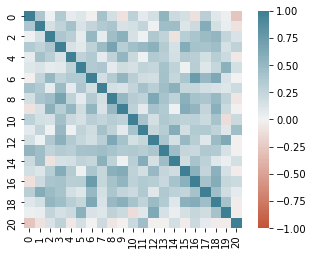

In [27]:
df= pd.read_excel('STICSA State.xlsx', sheet_name = 'Análise Sessão 1')
print(df.shape)
df_state = df.T
#df_state.head()
df_state = df_state.reset_index(drop=True)
#df_state.drop([0], axis=0, inplace=True)
#df_state.head()
df_state.columns = df_state.loc[0]
df_state.drop([0], axis=0, inplace=True)
df_state.head()
from sklearn import preprocessing 
scale_df_state = preprocessing.scale(X = df_state)
scale_df_state = pd.DataFrame(data = scale_df_state)
#print(scale_df_state.corr())
print(scale_df_state.head())
sns.heatmap(data = scale_df_state.corr(),vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),square =True)
# Não consigo pressupor daqui um número de fatores obvio

In [28]:
fa = FactorAnalyzer(n_factors = 4, rotation = 'varimax')
fa.fit(scale_df_state)

ev, v = fa.get_eigenvalues()
print(ev)

[6.79021572 2.54286471 1.78896157 1.64887383 1.5770482  1.11272807
 0.97201685 0.89690851 0.72694765 0.58550218 0.42441913 0.39674278
 0.38781484 0.32979345 0.24932323 0.18683343 0.14900962 0.09725357
 0.07410662 0.04826385 0.0143722 ]


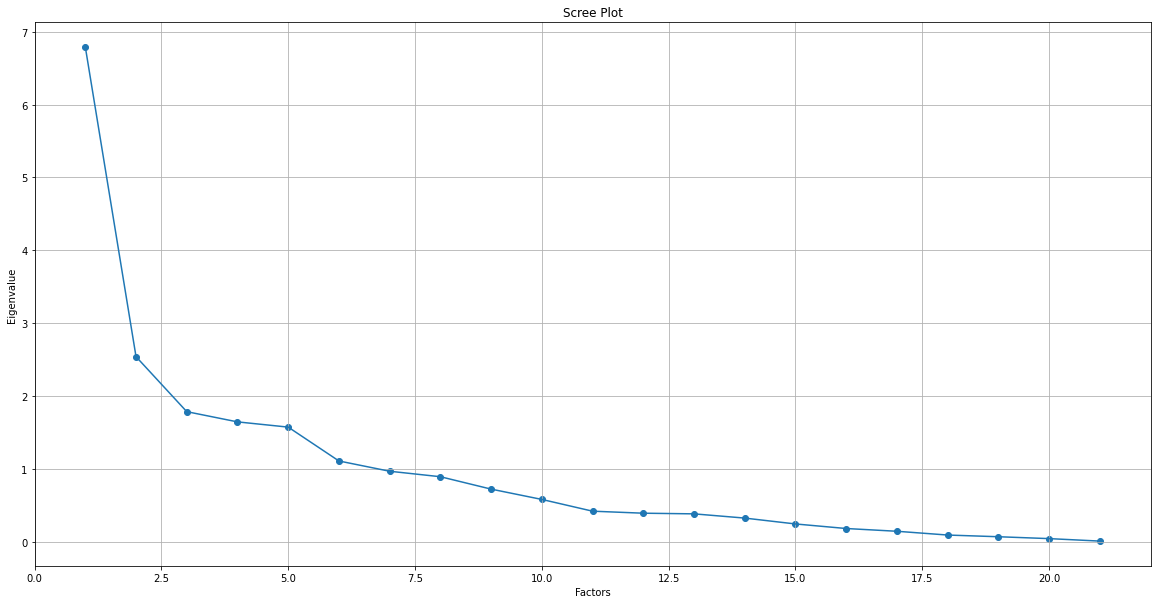

In [29]:
plt.figure(figsize=(20,10))
plt.scatter(range(1,scale_df_state.shape[1]+1),ev)
plt.plot(range(1,scale_df_state.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')

plt.grid()
plt.show()

In [32]:
fa = FactorAnalyzer(n_factors = 6, rotation = None)
fa.fit(scale_df_state)

L = fa.loadings_
np.round(L,2)

array([[ 0.29,  0.46,  0.12, -0.59, -0.06, -0.03],
       [ 0.46,  0.37, -0.16, -0.31,  0.26,  0.07],
       [ 0.54, -0.38, -0.16, -0.06,  0.03,  0.17],
       [ 0.71,  0.11, -0.01, -0.01, -0.56,  0.19],
       [ 0.45, -0.17, -0.  , -0.12,  0.21, -0.24],
       [ 0.39,  0.13,  0.44,  0.25,  0.42, -0.13],
       [ 0.67, -0.2 , -0.31,  0.13,  0.35, -0.12],
       [ 0.46,  0.49,  0.2 ,  0.05, -0.07, -0.14],
       [ 0.71, -0.13,  0.01, -0.19, -0.27,  0.05],
       [ 0.64, -0.46, -0.14,  0.01,  0.02, -0.26],
       [ 0.47,  0.21, -0.17,  0.08, -0.16, -0.18],
       [ 0.49,  0.49,  0.02,  0.43, -0.15,  0.14],
       [ 0.63, -0.24,  0.51, -0.09, -0.31, -0.02],
       [ 0.63,  0.32,  0.1 , -0.24,  0.17, -0.21],
       [ 0.44,  0.57,  0.02,  0.17,  0.14, -0.15],
       [ 0.64, -0.24, -0.09, -0.07, -0.3 , -0.16],
       [ 0.7 , -0.17, -0.19,  0.36,  0.12, -0.06],
       [ 0.62,  0.15, -0.37, -0.17,  0.28,  0.59],
       [ 0.72, -0.32, -0.06,  0.02,  0.04,  0.04],
       [ 0.4 , -0.31,  0.76,  0

In [6]:
fa.get_factor_variance()

(array([6.46373876, 2.16507122, 1.46743352, 1.37992818, 1.2831294 ,
        0.8697243 ]),
 array([0.30779708, 0.10309863, 0.06987779, 0.06571087, 0.0611014 ,
        0.04141544]),
 array([0.30779708, 0.41089571, 0.4807735 , 0.54648437, 0.60758577,
        0.64900121]))

In [33]:
fa = FactorAnalyzer(n_factors = 6, rotation = 'varimax')
fa.fit(scale_df_state)


FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [36]:
L = pd.DataFrame(fa.loadings_)
np.round(L,2)
L.index = df_state.columns
L.columns = ['F1','F2','F3','F4','F5','F6']
L

,F1,F2,F3,F4,F5,F6
0,,,,,,
O meu coração bate rápido,-0.178880,0.657093,0.275913,-0.282870,-0.024769,0.186115
Os meus músculos estão tensos,0.169497,0.577284,0.015681,-0.062654,-0.026543,0.429753
Sinto-me agoniado com os meus problemas,0.524925,-0.097458,0.315214,-0.032412,0.101768,0.315378
Eu penso que os outros não me aprovarão,0.158851,0.237115,0.798307,0.328736,-0.034990,0.192163
Eu sinto que me vou perdendo porque não consigo decidir-me atempadamente,0.502909,0.229982,0.078797,-0.148395,0.132392,-0.009670
Sinto-me tonto,0.255266,0.361620,-0.159086,0.205283,0.586174,-0.093884
Sinto fraqueza nos meus músculos,0.794428,0.168532,-0.017308,0.124543,0.046762,0.230839
Sinto-me trémulo e instável,0.020599,0.616734,0.203808,0.291980,0.119761,-0.047260
Eu perspetivo algumas desgraças futuras,0.375655,0.210391,0.640444,0.000827,0.068171,0.179392


In [37]:
fa.get_factor_variance()

(array([3.55206758, 2.73796719, 2.58172934, 1.69753157, 1.66454763,
        1.39518211]),
 array([0.16914608, 0.13037939, 0.12293949, 0.08083484, 0.07926417,
        0.06643724]),
 array([0.16914608, 0.29952547, 0.42246496, 0.50329979, 0.58256397,
        0.64900121]))

In [38]:
np.round(fa.get_factor_variance()/np.sum(fa.get_factor_variance()),2)

array([[0.21, 0.16, 0.15, 0.1 , 0.1 , 0.08],
       [0.01, 0.01, 0.01, 0.  , 0.  , 0.  ],
       [0.01, 0.02, 0.02, 0.03, 0.03, 0.04]])

In [21]:
# Verificação da adequação da análise fatorial aos dados: 

from scipy.stats import bartlett
print(df_state.columns)
stats, pvalue = bartlett(df_state['O meu coração bate rápido'],df_state['Os meus músculos estão tensos '],df_state['Sinto-me agoniado com os meus problemas'],df_state['Eu penso que os outros não me aprovarão'],df_state['Eu sinto que me vou perdendo porque não consigo decidir-me atempadamente'],df_state['Sinto-me tonto'],df_state['Sinto fraqueza nos meus músculos'],df_state['Sinto-me trémulo e instável'],df_state['Eu perspetivo algumas desgraças futuras'],df_state['Não consigo tirar alguns pensamentos da minha cabeça'],df_state['Tenho dificuldade em relembrar coisas'],df_state['Sinto a minha face quente'],df_state['Eu penso que o pior vai acontecer'],df_state['Sinto que os meus braços e pernas estão hirtos '],df_state['Sinto a garganta seca'],df_state['Eu esforço-me a evitar pensamentos desconfortáveis'],df_state['Não me consigo concentrar sem a intrusão de pensamentos irrelevantes'],df_state['A minha respiração é rápida e superficial'],df_state['Preocupo-me por não conseguir controlar os meus pensamentos tão bem como eu gostaria'],df_state['Tenho borboletas no estômago'],df_state['Sinto as palmas das mãos húmidas'])
print(pvalue) # é menor que o nivel de significancia (5%), pelo que rejeitamos H0, pelo que a análise fatorial é adequada aos dados

# Ou: 
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
df_state2 = df_state.astype(float)
chi_square_value,p_value=calculate_bartlett_sphericity(df_state2)
print(chi_square_value, p_value)

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_state2)
print(kmo_model) #Pelo valor geral de KMO (0.42) indica por sua vez que não é aceitável proceder com a análise fatorial planeada

Index(['O meu coração bate rápido', 'Os meus músculos estão tensos ',
       'Sinto-me agoniado com os meus problemas',
       'Eu penso que os outros não me aprovarão',
       'Eu sinto que me vou perdendo porque não consigo decidir-me atempadamente',
       'Sinto-me tonto', 'Sinto fraqueza nos meus músculos',
       'Sinto-me trémulo e instável',
       'Eu perspetivo algumas desgraças futuras',
       'Não consigo tirar alguns pensamentos da minha cabeça',
       'Tenho dificuldade em relembrar coisas', 'Sinto a minha face quente',
       'Eu penso que o pior vai acontecer',
       'Sinto que os meus braços e pernas estão hirtos ',
       'Sinto a garganta seca',
       'Eu esforço-me a evitar pensamentos desconfortáveis',
       'Não me consigo concentrar sem a intrusão de pensamentos irrelevantes',
       'A minha respiração é rápida e superficial',
       'Preocupo-me por não conseguir controlar os meus pensamentos tão bem como eu gostaria',
       'Tenho borboletas no estômago'

In [40]:
# Scores: 
fa.transform(X = df_state)
fa.transform(X= scale_df_state)

array([[ 7.26489497e-01, -5.33575232e-01,  1.43631417e+00,
         1.85167915e-01, -1.36834149e+00, -1.29530308e+00],
       [-2.42678221e-01, -1.07384865e+00,  2.15282973e-01,
         3.72882074e-01, -8.77242113e-02, -4.32112954e-01],
       [ 2.36077464e-01, -7.60063584e-01, -9.46625542e-01,
         5.68822391e-02, -1.13478140e-01, -7.36745857e-01],
       [-4.15805075e-01, -9.28506331e-04,  1.38701856e+00,
         1.44947533e+00, -4.16080002e-01, -1.38674128e+00],
       [-2.83062082e-01, -3.22254492e-01,  2.72868066e-01,
         2.29676815e-01, -3.61770283e-01, -3.25793336e-01],
       [-9.91144308e-02,  1.99485485e-01, -1.11963632e+00,
         9.93632343e-01, -3.05779555e-02, -8.09426984e-01],
       [-2.38259000e-01, -7.46299707e-01, -6.16981272e-01,
        -2.66974843e-01, -1.03026402e-02, -5.47680711e-01],
       [-8.47822808e-01, -5.30590724e-01, -6.71541603e-01,
         2.16460122e-01, -2.54838065e-01, -2.80197704e-01],
       [-8.18039199e-01,  3.32628711e-01, -1.280